<a href="https://colab.research.google.com/github/marianogoes/PCD/blob/main/Metricas_evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de clasificacion

- Regresion logistica
- Clasificador Naive Bayes
- K-nearest neighbor
- Arbol de decision
- Random Forest
- Maquina de soporte vectorial
- Redes neuronales

# Metricas de evaluacion

Los problemas de clasificacion tienen una salida discreta, asi que necesitamos una metrica que nos ayude a comparar las clases del tipo discreta. Las metricas de evaluacion para clasificacion evaluan el rendimiento de un modelo diciendonos que tan malo o bueno es el resultado de la clasificacion. El tipo de metrica que elegimos depende del enfoque del problema.

Las metricas que utilizamos son:

- Exactitud (Accuracy)
- Matriz de confusion
- Precision y memoria (Precision, recall)
- Score F1
- AU-ROC

## Exactitud (accuracy)

En la clasificacion, la exactitud es una de las metricas mas simples de implementar, y se define como el numero de predicciones correctas divididas por el total numero de predicciones, multiplicado todo por 100. 

\begin{align}
       Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}

Esta metrica solo es bueno utilizarla cuando nuestra clase objetivo es balanceada. Cuando no es el caso, pasamos a las otras metricas.

## Matriz de confusion

La matriz de confusion es una metrica en la cual podemos interpretar graficamente los resultados mencionados en la formula de arriba:

- TP: True positive o verdadero positivo

- TN: True negative o verdadero negativo

- FP: False positive o falso positivo

- FN: False negative o falso negativo.

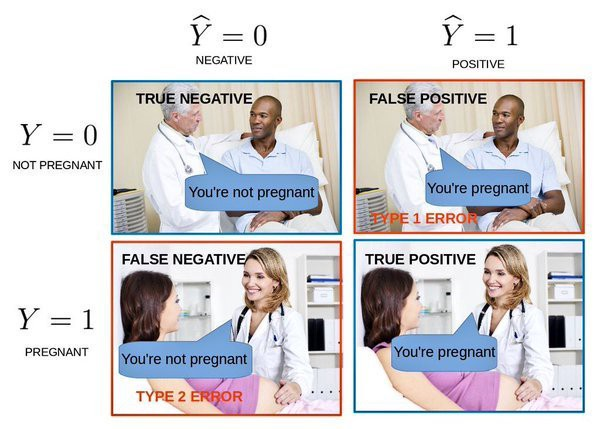

## Precision

Esta metrica explica cuantas de las clases predecidas resultaron ser correctas. En este caso, la metrica de precision es buena cuando se tienen casos en los que los falsos positivos son de mayor importancia que los falsos negativos. 

\begin{align}
       Precision = \frac{TP}{TP +FP}
\end{align}

## Recall (memoria a sensibilidad)

Esta metrica nos dice cuantos verdaderos casos positivos pudo nuestro modelo predecir de manera correcta. Aqui nos conviene usar esta metrica cuando los falsos negativos con mas importantes que los falsos positivos.

\begin{align}
       Recall = \frac{TP}{TP +FN}
\end{align}


## F1 score

Esta metrica combina las dos metricas anteriores para darnos un mejor balance (cuando ambos casos son importantes en tu problema)

\begin{align}
       F1 = 2 * \frac{Precision * Recall}{Precision + Recall}
\end{align}

## AUC ROC

Del gráfico que se muestra a continuación, cuanto mayor sea el AUC, mejor será el rendimiento del modelo en diferentes puntos de umbral entre las clases positivas y negativas. Esto simplemente significa que cuando AUC es igual a 1, el clasificador puede distinguir perfectamente entre todos los puntos de clase Positivos y Negativos. Cuando AUC es igual a 0, el clasificador estaría prediciendo todos los Negativos como Positivos y viceversa. Cuando AUC es 0.5, el clasificador no puede distinguir entre las clases Positiva y Negativa.

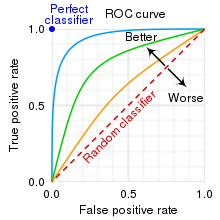

## Log loss o logistic loss

Esta caracteristica la vemos mas cuando estamos modelando redes neuronales.

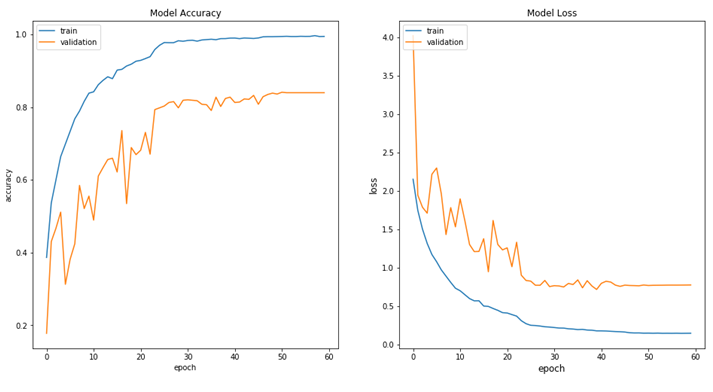

## Regresion logistica

Este algoritmo de clasificacion usa una o mas variables independientes para determinar la salida. 

La variable de resultado o objetivo es de naturaleza dicotómica. Dicotómico significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de cáncer. Calcula la probabilidad de ocurrencia de un evento. Es un caso especial de regresión lineal donde la variable objetivo es de naturaleza categórica. Utiliza un registro de probabilidades como variable dependiente. La regresión logística predice la probabilidad de ocurrencia de un evento binario utilizando una función logit.

In [3]:
import pandas as pd

pima = pd.read_csv("/content/diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

Text(0.5, 257.44, 'Predicted label')

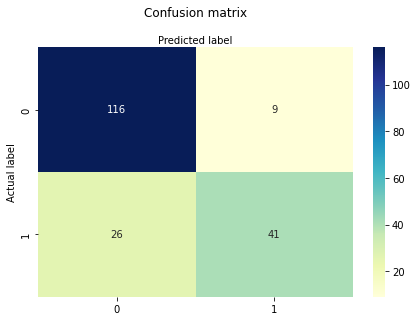

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [11]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



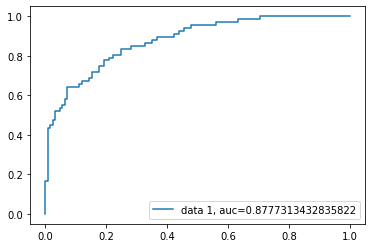

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
pima['Outcome'].sum()

268

In [14]:
pima.shape

(768, 9)

- Ventajas:

La regresión logística está diseñada específicamente para la clasificación, es útil para comprender cómo un conjunto de variables independientes afecta el resultado de la variable dependiente.

- Desventajas:

La principal desventaja del algoritmo de regresión logística es que solo funciona cuando la variable pronosticada es binaria, asume que los datos están libres de valores faltantes y asume que los predictores son independientes entre sí.

## Clasificador Naive bayes

Es un algoritmo de clasificación basado en el teorema de Bayes que da una suposición de independencia entre los predictores. En términos simples, un clasificador Naive Bayes asume que la presencia de una característica particular en una clase no está relacionada con la presencia de ninguna otra característica.

Incluso si las características dependen unas de otras, todas estas propiedades contribuyen a la probabilidad de forma independiente. El modelo Naive Bayes es fácil de hacer y es particularmente útil para conjuntos de datos comparativamente grandes. Incluso con un enfoque simplista, se sabe que Naive Bayes supera a la mayoría de los métodos de clasificación en el aprendizaje automático.

- Ventajas y desventajas:

El clasificador Naive Bayes requiere una pequeña cantidad de datos de entrenamiento para estimar los parámetros necesarios para obtener los resultados. Son de naturaleza extremadamente rápida en comparación con otros clasificadores.

La única desventaja es que se sabe que son malos estimadores.

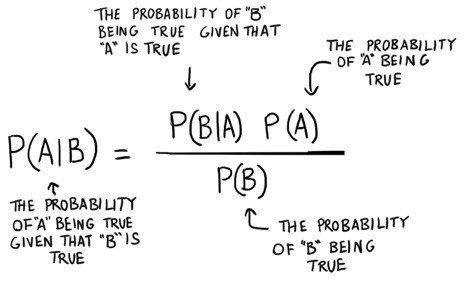

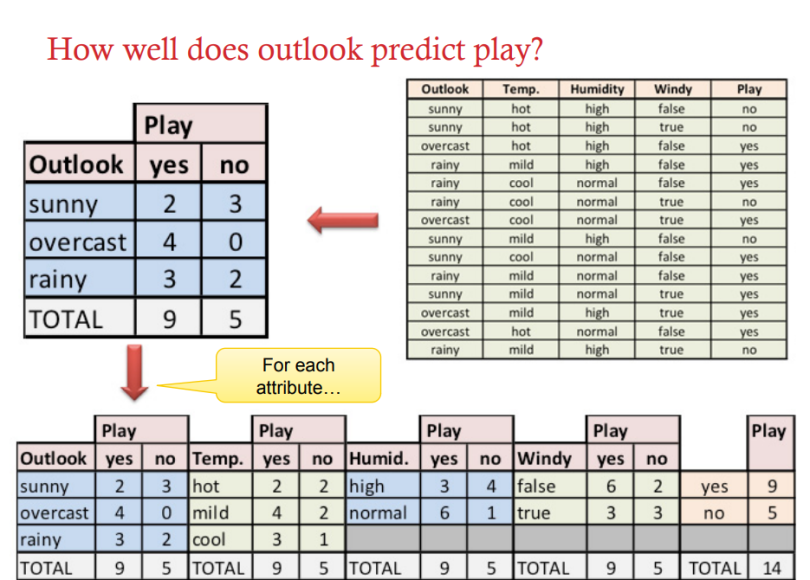

In [15]:
from sklearn.naive_bayes import GaussianNB

## K-nearest neighbor

Es un algoritmo de aprendizaje perezoso que almacena todas las instancias correspondientes a los datos de entrenamiento en un espacio n-dimensional. Es un algoritmo de aprendizaje perezoso ya que no se enfoca en construir un modelo interno general, sino que funciona en el almacenamiento de instancias de datos de entrenamiento.

La clasificación se calcula a partir de un voto de mayoría simple de los k vecinos más cercanos de cada punto. Está supervisado y toma un montón de puntos etiquetados y los usa para etiquetar otros puntos. Para etiquetar un nuevo punto, mira los puntos etiquetados más cercanos a ese nuevo punto, también conocidos como sus vecinos más cercanos. Tiene el voto de esos vecinos, por lo que cualquier etiqueta que tenga la mayoría de los vecinos es la etiqueta para el nuevo punto. La “k” es el número de vecinos que comprueba.

- Ventajas y desventajas:

Este algoritmo es bastante simple en su implementación y es robusto para datos de entrenamiento ruidosos. Incluso si los datos de entrenamiento son grandes, son bastante eficientes. La única desventaja del algoritmo KNN es que no es necesario determinar el valor de K y el costo de cálculo es bastante alto en comparación con otros algoritmos.

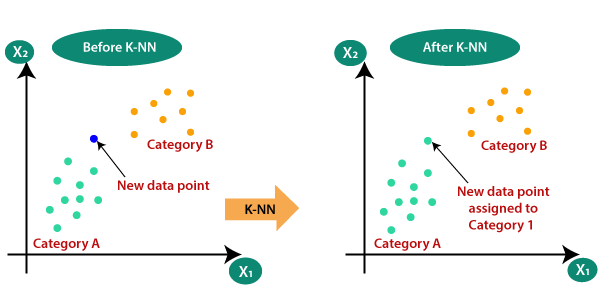

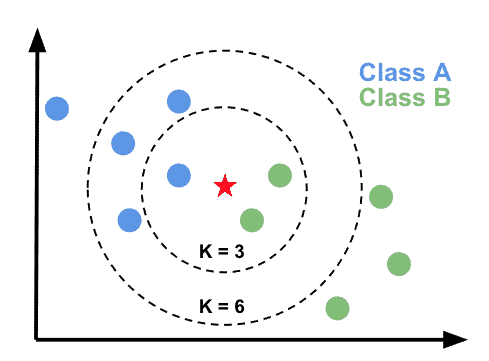

## Arbol de decision:

El algoritmo del árbol de decisión construye el modelo de clasificación en forma de estructura de árbol. Utiliza las reglas si-entonces que son igualmente exhaustivas y mutuamente excluyentes en la clasificación. El proceso continúa con el desglose de los datos en estructuras más pequeñas y, finalmente, la asociación con un árbol de decisión incremental. La estructura final parece un árbol con nudos y hojas. Las reglas se aprenden secuencialmente utilizando los datos de entrenamiento de uno en uno. Cada vez que se aprende una regla, se eliminan las tuplas que cubren las reglas. El proceso continúa en el conjunto de entrenamiento hasta que se alcanza el punto de terminación.

El árbol está construido en un enfoque recursivo de división y conquista de arriba hacia abajo. Un nodo de decisión tendrá dos o más ramas y una hoja representa una clasificación o decisión. El nodo superior en el árbol de decisión que corresponde al mejor predictor se denomina nodo raíz, y lo mejor de un árbol de decisión es que puede manejar datos categóricos y numéricos.

- Ventajas y desventajas:

Un árbol de decisiones ofrece la ventaja de la simplicidad de comprensión y visualización, además requiere muy poca preparación de datos. La desventaja que sigue con el árbol de decisión es que puede crear árboles complejos que pueden categorizarse de manera eficiente. Pueden ser bastante inestables porque incluso un cambio simplista en los datos puede obstaculizar toda la estructura del árbol de decisión.

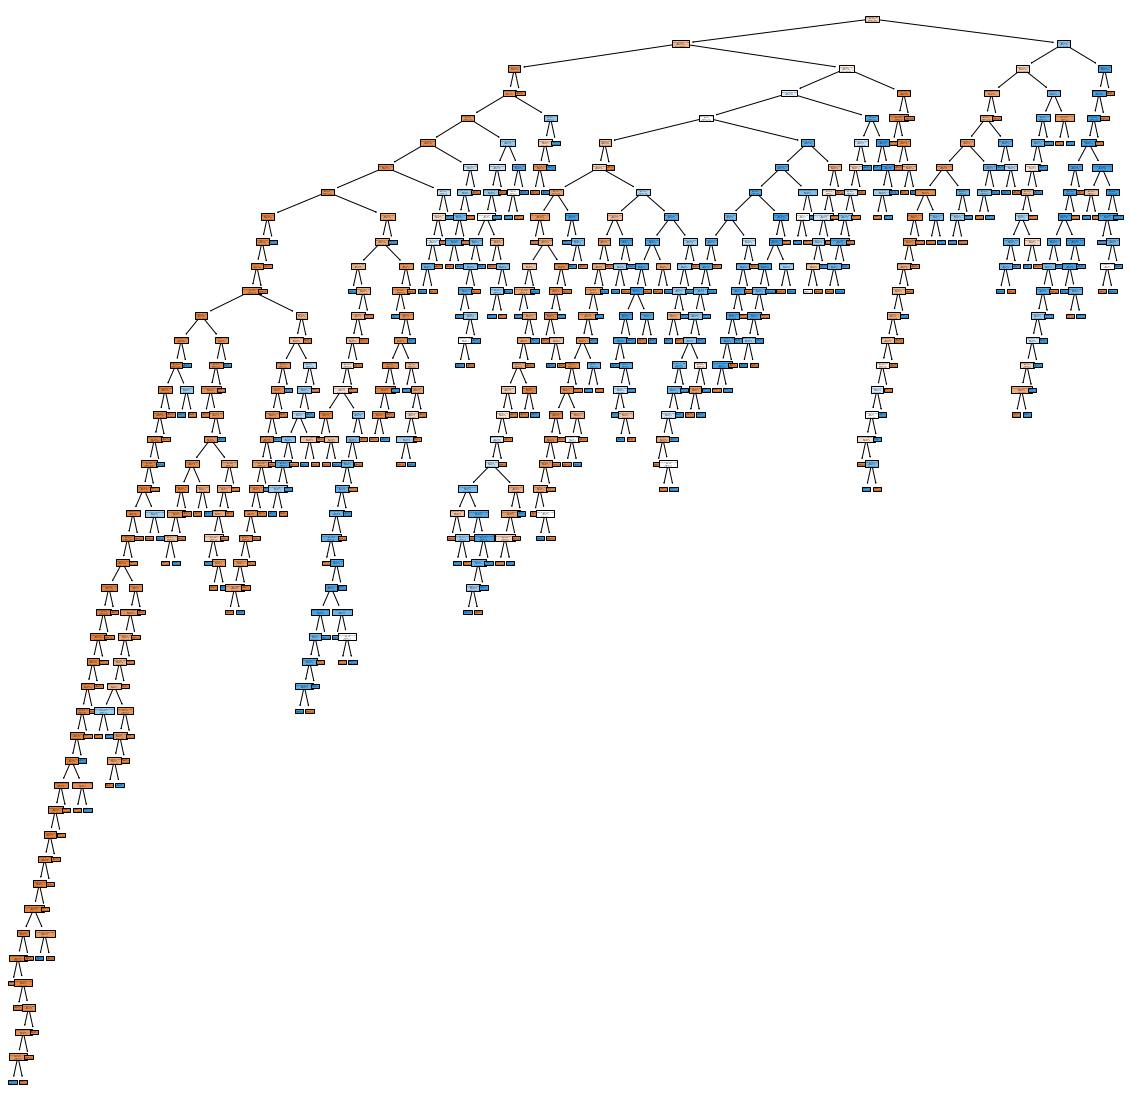

## Random forest

Los árboles de decisión aleatorios o los bosques aleatorios son un método de aprendizaje conjunto para clasificación, regresión, etc. Funciona mediante la construcción de una multitud de árboles de decisión en el momento del entrenamiento y genera la clase que es el modo de las clases o clasificación o predicción media (regresión) de los árboles individuales.

Un bosque aleatorio es un metaestimador que ajusta una cantidad de árboles en varias submuestras de conjuntos de datos y luego usa un promedio para mejorar la precisión en la naturaleza predictiva del modelo. El tamaño de la submuestra siempre es el mismo que el del tamaño de entrada original, pero las muestras a menudo se extraen con reemplazos.

- Ventajas y desventajas:

La ventaja del bosque aleatorio es que es más preciso que los árboles de decisión debido a la reducción del sobreajuste. La única desventaja con los clasificadores de bosques aleatorios es que es bastante complejo en la implementación y se vuelve bastante lento en la predicción en tiempo real.

## Maquina de soporte vectorial

La máquina de vectores de soporte es un clasificador que representa los datos de entrenamiento como puntos en el espacio separados en categorías por un espacio lo más amplio posible. Luego se agregan nuevos puntos al espacio prediciendo en qué categoría caen y a qué espacio pertenecerán.



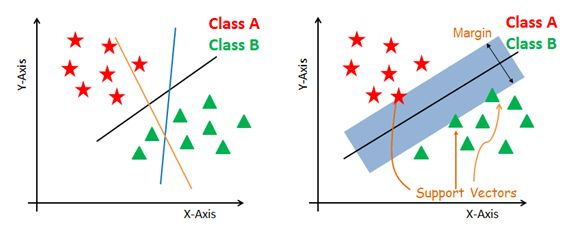

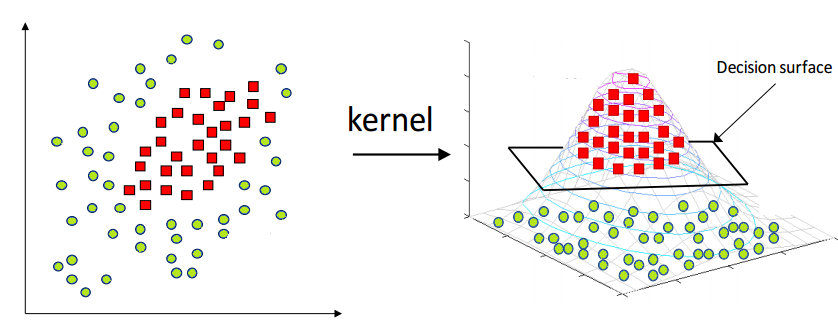

## Redes neuronales

Una red neuronal consta de neuronas que están dispuestas en capas, toman algún vector de entrada y lo convierten en una salida. El proceso involucra que cada neurona tome la entrada y aplique una función que a menudo es una función no lineal y luego pasa la salida a la siguiente capa.

En general, se supone que la red es de retroalimentación, lo que significa que la unidad o neurona alimenta la salida a la siguiente capa, pero no hay participación de ninguna retroalimentación en la capa anterior.

Se aplican ponderaciones a las señales que pasan de una capa a otra, y estas son las ponderaciones que se sintonizan en la fase de entrenamiento para adaptar una red neuronal para cualquier problema planteado.

- Ventajas y desventajas:

Tiene una alta tolerancia a los datos ruidosos y es capaz de clasificar patrones no entrenados, se desempeña mejor con entradas y salidas de valor continuo. La desventaja de las redes neuronales artificiales es que tiene una mala interpretación en comparación con otros modelos.

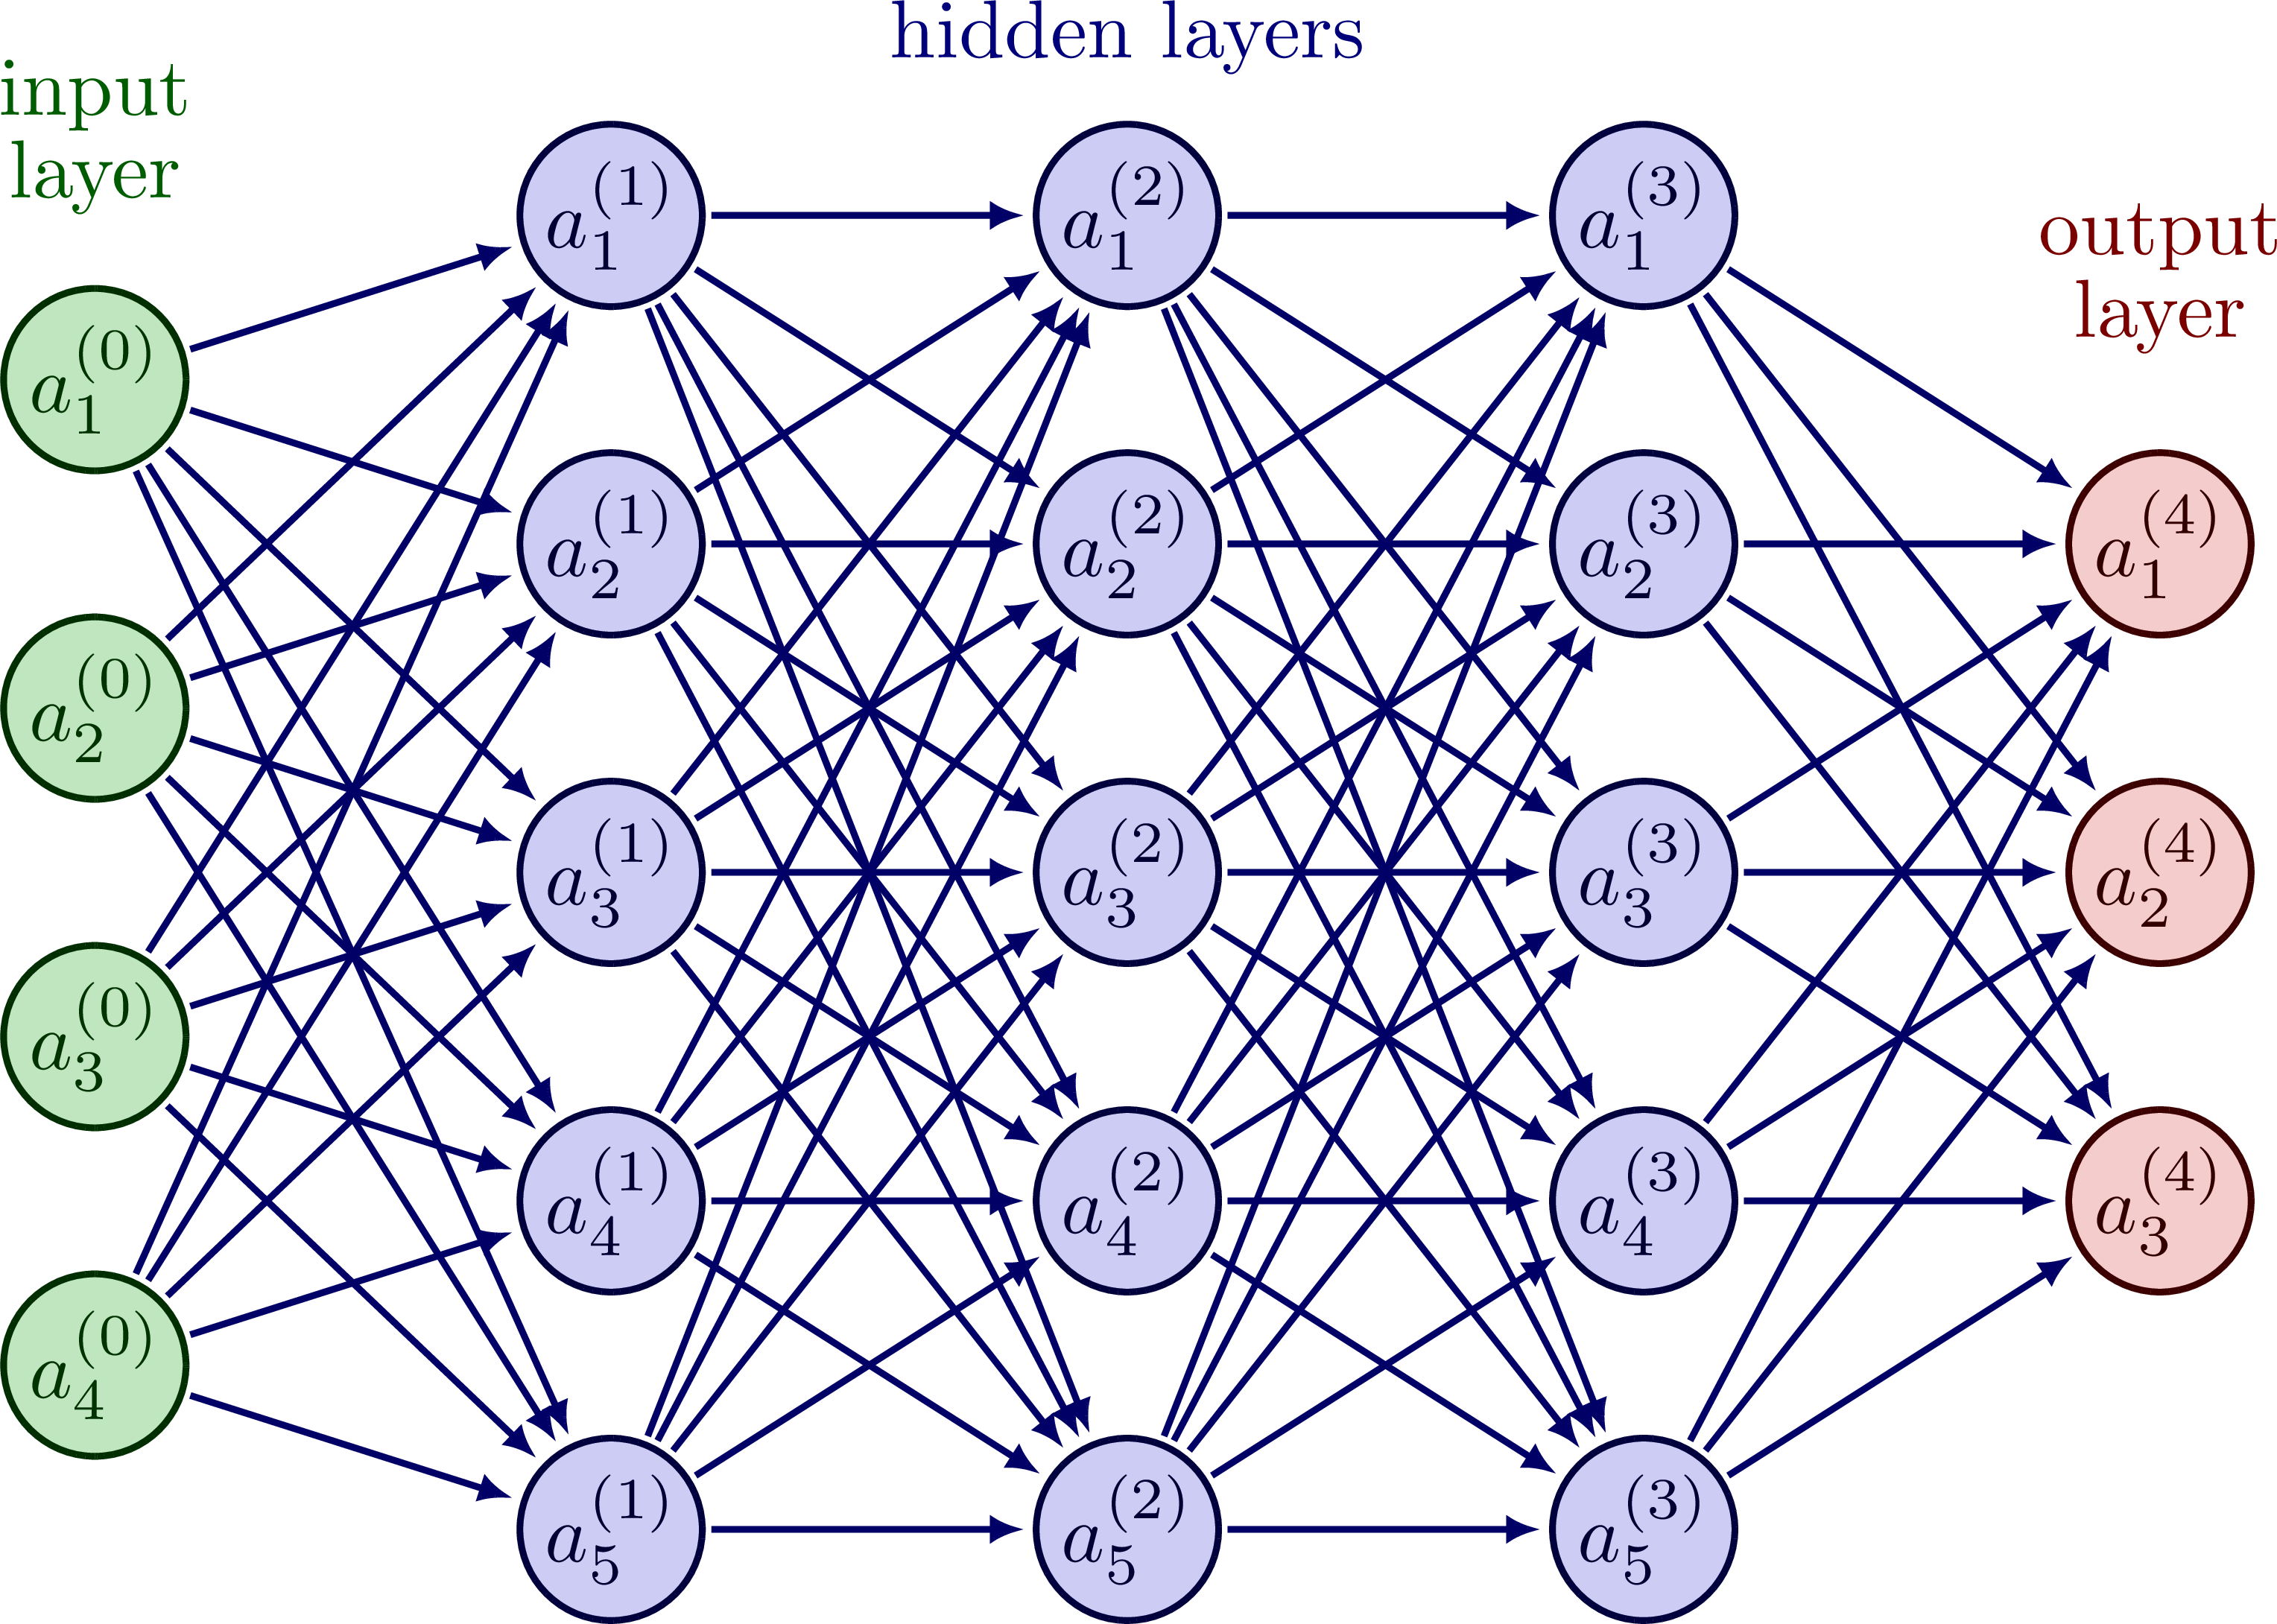

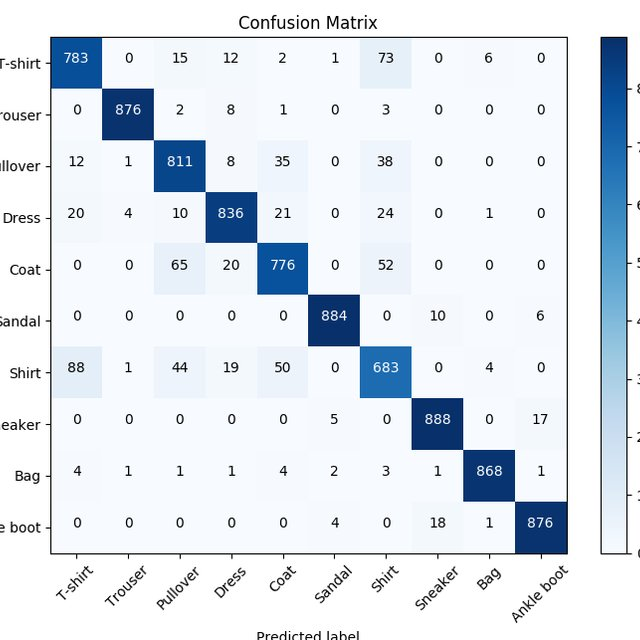

# Practica

Usando la libreria de sklearn, implementar todos los modulos necesarios para realizar los modelos que se mencionan como algoritmos de clasificacion de aprendizaje supervisado.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Gaussian
from sklearn.gaussian_process import GaussianProcessClassifier

#Decision tree
from sklearn.tree import DecisionTreeClassifier

#Maquina de soporte vectorial
from sklearn.svm import SVC

#Red neuronal
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
#Randomforest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


#Metricas de evaluacion
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



Ejemplos de cada modelo

- [Regresion logistica](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)
- [Clasificador Naive Bayes](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)
- [K-nearest neighbor](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)
- [Arbol de decision](https://www.datacamp.com/tutorial/decision-tree-classification-python)
- [Random Forest](https://www.datacamp.com/tutorial/random-forests-classifier-python)
- [Maquina de soporte vectorial](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)
- [Redes neuronales](https://www.datacamp.com/cheat-sheet/keras-cheat-sheet-neural-networks-in-python)

##Clasificador Naive Bayes


In [17]:
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(X_train,y_train)
#Predict Output
y_pred= model.predict(X_test)
print("Predicted Value:", y_pred)

Predicted Value: [0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 1]


In [18]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  13],
       [ 22,  45]])

Text(0.5, 257.44, 'Predicted label')

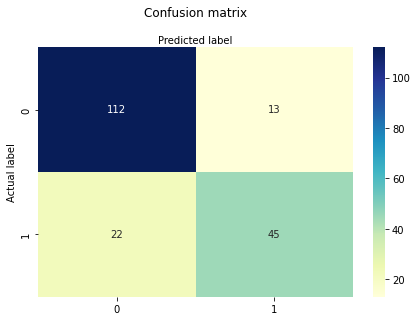

In [19]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [20]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.84      0.90      0.86       125
   with diabetes       0.78      0.67      0.72        67

        accuracy                           0.82       192
       macro avg       0.81      0.78      0.79       192
    weighted avg       0.81      0.82      0.81       192



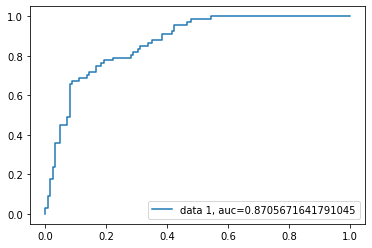

In [21]:
y_pred_proba= model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##K-nearest neighbor

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
model.fit(X_train,y_train)
#Predict Output
y_pred= model.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0]


In [23]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,   7],
       [ 47,  20]])

Text(0.5, 257.44, 'Predicted label')

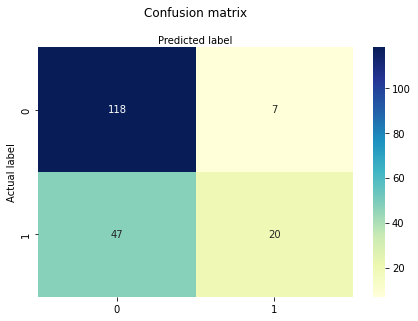

In [24]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.72      0.94      0.81       125
   with diabetes       0.74      0.30      0.43        67

        accuracy                           0.72       192
       macro avg       0.73      0.62      0.62       192
    weighted avg       0.72      0.72      0.68       192



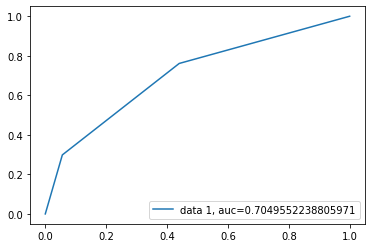

In [26]:
y_pred_proba= model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##Árbol de decisión

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [28]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[100,  25],
       [ 27,  40]])

Text(0.5, 257.44, 'Predicted label')

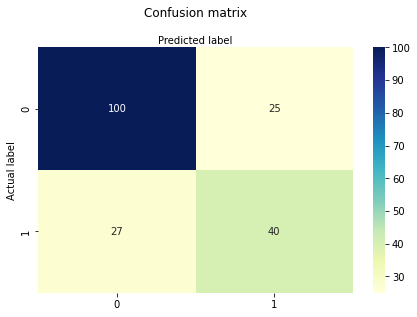

In [29]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.80      0.79       125
   with diabetes       0.62      0.60      0.61        67

        accuracy                           0.73       192
       macro avg       0.70      0.70      0.70       192
    weighted avg       0.73      0.73      0.73       192



##Random Forest

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [32]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  12],
       [ 28,  39]])

Text(0.5, 257.44, 'Predicted label')

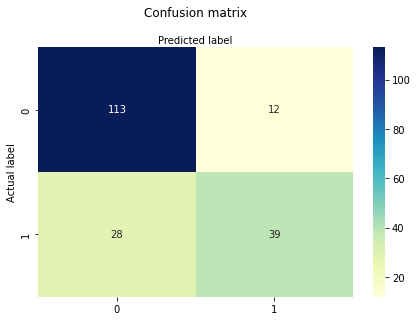

In [34]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.90      0.85       125
   with diabetes       0.76      0.58      0.66        67

        accuracy                           0.79       192
       macro avg       0.78      0.74      0.76       192
    weighted avg       0.79      0.79      0.78       192



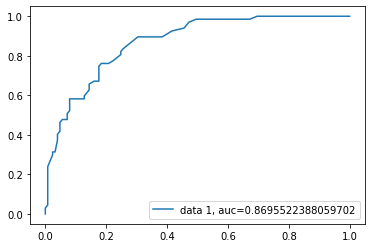

In [36]:
y_pred_proba= clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##Máquina de soporte vectorial

In [37]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [38]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 257.44, 'Predicted label')

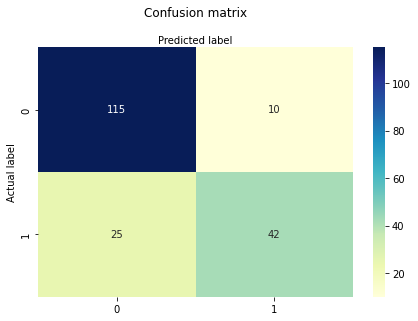

In [39]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



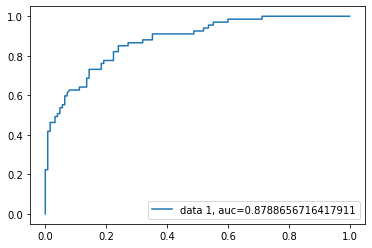

In [41]:
y_pred_proba= clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##Redes Neuronales

In [42]:
#Red neuronal
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [43]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[99, 26],
       [26, 41]])

Text(0.5, 257.44, 'Predicted label')

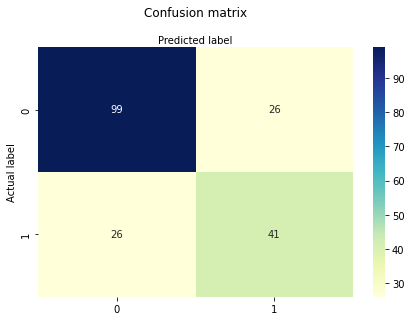

In [44]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.79      0.79       125
   with diabetes       0.61      0.61      0.61        67

        accuracy                           0.73       192
       macro avg       0.70      0.70      0.70       192
    weighted avg       0.73      0.73      0.73       192



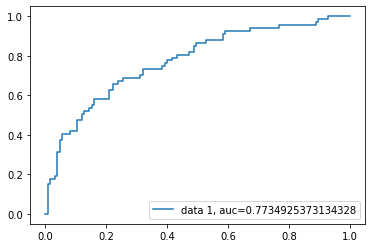

In [46]:
y_pred_proba= clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##Conclusiones
Tomando en cuenta los datos que se están analizando y la predicción que se espera obtener (si una persona tiene o no tiene diabetes) tendría que tener más relevancia aquellos modelos en los que se rechacen menos falsos negativos, esto debido a que se estaría considerando a una persona enferma como sana y tiene mayores consecuencias que decirle a una persona sana que está enferma pues una segunda revisión descartaría el problema en el modelo.
Por lo tanto se le debe de dar mayor importancia al indicador de Recall que entre más cercano a 1 nos indicará menor cantidad de falsos negativos y en estos ejercicios el que tiene mejor desempeño es el de Naive Bayes.
